<a href="https://colab.research.google.com/github/JessiPool/KaggleXProject/blob/regression/regressioninventory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import auth
auth.authenticate_user()

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import Sample Zillow inventory and sales, US (national), 2011-2020

In [5]:
df_usinv = pd.read_csv('/content/drive/MyDrive/Data/KaggleX/pythondata/usinv_merge.csv')

In [ ]:
df_usinv

,median_household_income,state,year_only,monthly_housing_budget,affordability_pct_US,average_CPI,avg_stock_market_closing_value,GDP_by_billion_USD,Per_Capita_USD,Annual_Percentage_Growth_Change,...,Medicare_in_Billions_USD,Medicaid_in_Billions_USD,Other_Health_Insurance_Programs_in_Billions_USD,Other_Third_Party_Payers_in_Billions_USD,Total_Federal_Grants_in_Millions,Total_Federal_Loans_in_Millions,Federal_Work_Study_in_Millions,Education_Tax_Benefits_in_Millions,TOTAL_FEDERAL__STATE___INSTITUTIONAL__AND_OTHER_AID_in_Millions,NONFEDERAL_LOANS_in_Millions
0,61140,US,2017,1426.600000,94.621812,245.121000,21750.20375,19477.34,59907.75,2.2419,...,659.1,516.0,125.4,272.7,44790.0,106883.0,1108.0,18060.0,266532.0,12800.0
1,56520,US,2015,1318.800000,95.672898,237.001750,17587.02917,18206.02,56762.73,2.7064,...,606.2,484.5,115.2,244.6,50036.0,111734.0,1123.0,20630.0,272117.0,11600.0
2,68010,US,2020,1586.900000,94.771427,258.850583,26890.67360,21060.47,63528.63,-2.7678,...,759.6,587.7,149.4,482.3,43165.0,95422.0,1177.0,13320.0,258117.0,15300.0
3,53590,US,2013,1250.433333,96.150835,232.951750,15009.52278,16843.19,53291.13,1.8419,...,553.5,405.7,100.8,234.2,52474.0,121243.0,1139.0,21740.0,278357.0,10900.0
4,63180,US,2018,1474.200000,95.372919,251.099500,25046.85735,20533.06,62823.31,2.9454,...,696.7,531.5,129.9,284.5,45407.0,103195.0,1085.0,16110.0,265610.0,13200.0
5,50050,US,2011,1167.833333,96.827990,224.923000,11957.57000,15599.73,50065.97,1.5499,...,511.8,373.7,94.6,211.0,58792.0,131971.0,1211.0,26690.0,294285.0,9600.0
6,59040,US,2016,1377.600000,95.587515,240.005417,17927.10734,18695.11,57866.74,1.6675,...,629.0,503.4,119.0,259.6,47924.0,109213.0,1122.0,19630.0,270348.0,12200.0
7,53660,US,2014,1252.066667,95.713207,236.715000,16777.69091,17550.68,55123.85,2.2878,...,579.3,446.9,107.1,237.5,51430.0,117865.0,1141.0,21480.0,276848.0,11100.0
8,68700,US,2019,1603.000000,95.671621,255.651667,26379.58702,21380.98,65120.39,2.2944,...,746.6,553.6,138.1,302.0,44442.0,98481.0,1208.0,14600.0,261149.0,14100.0
9,51020,US,2012,1190.466667,96.840296,229.586083,12966.43960,16253.97,51784.42,2.2807,...,533.6,388.3,97.3,225.2,53444.0,128940.0,1171.0,24300.0,286332.0,10000.0


In [ ]:
# Seaborn Pairplot, inventory and sales, US (national), 2011-2020

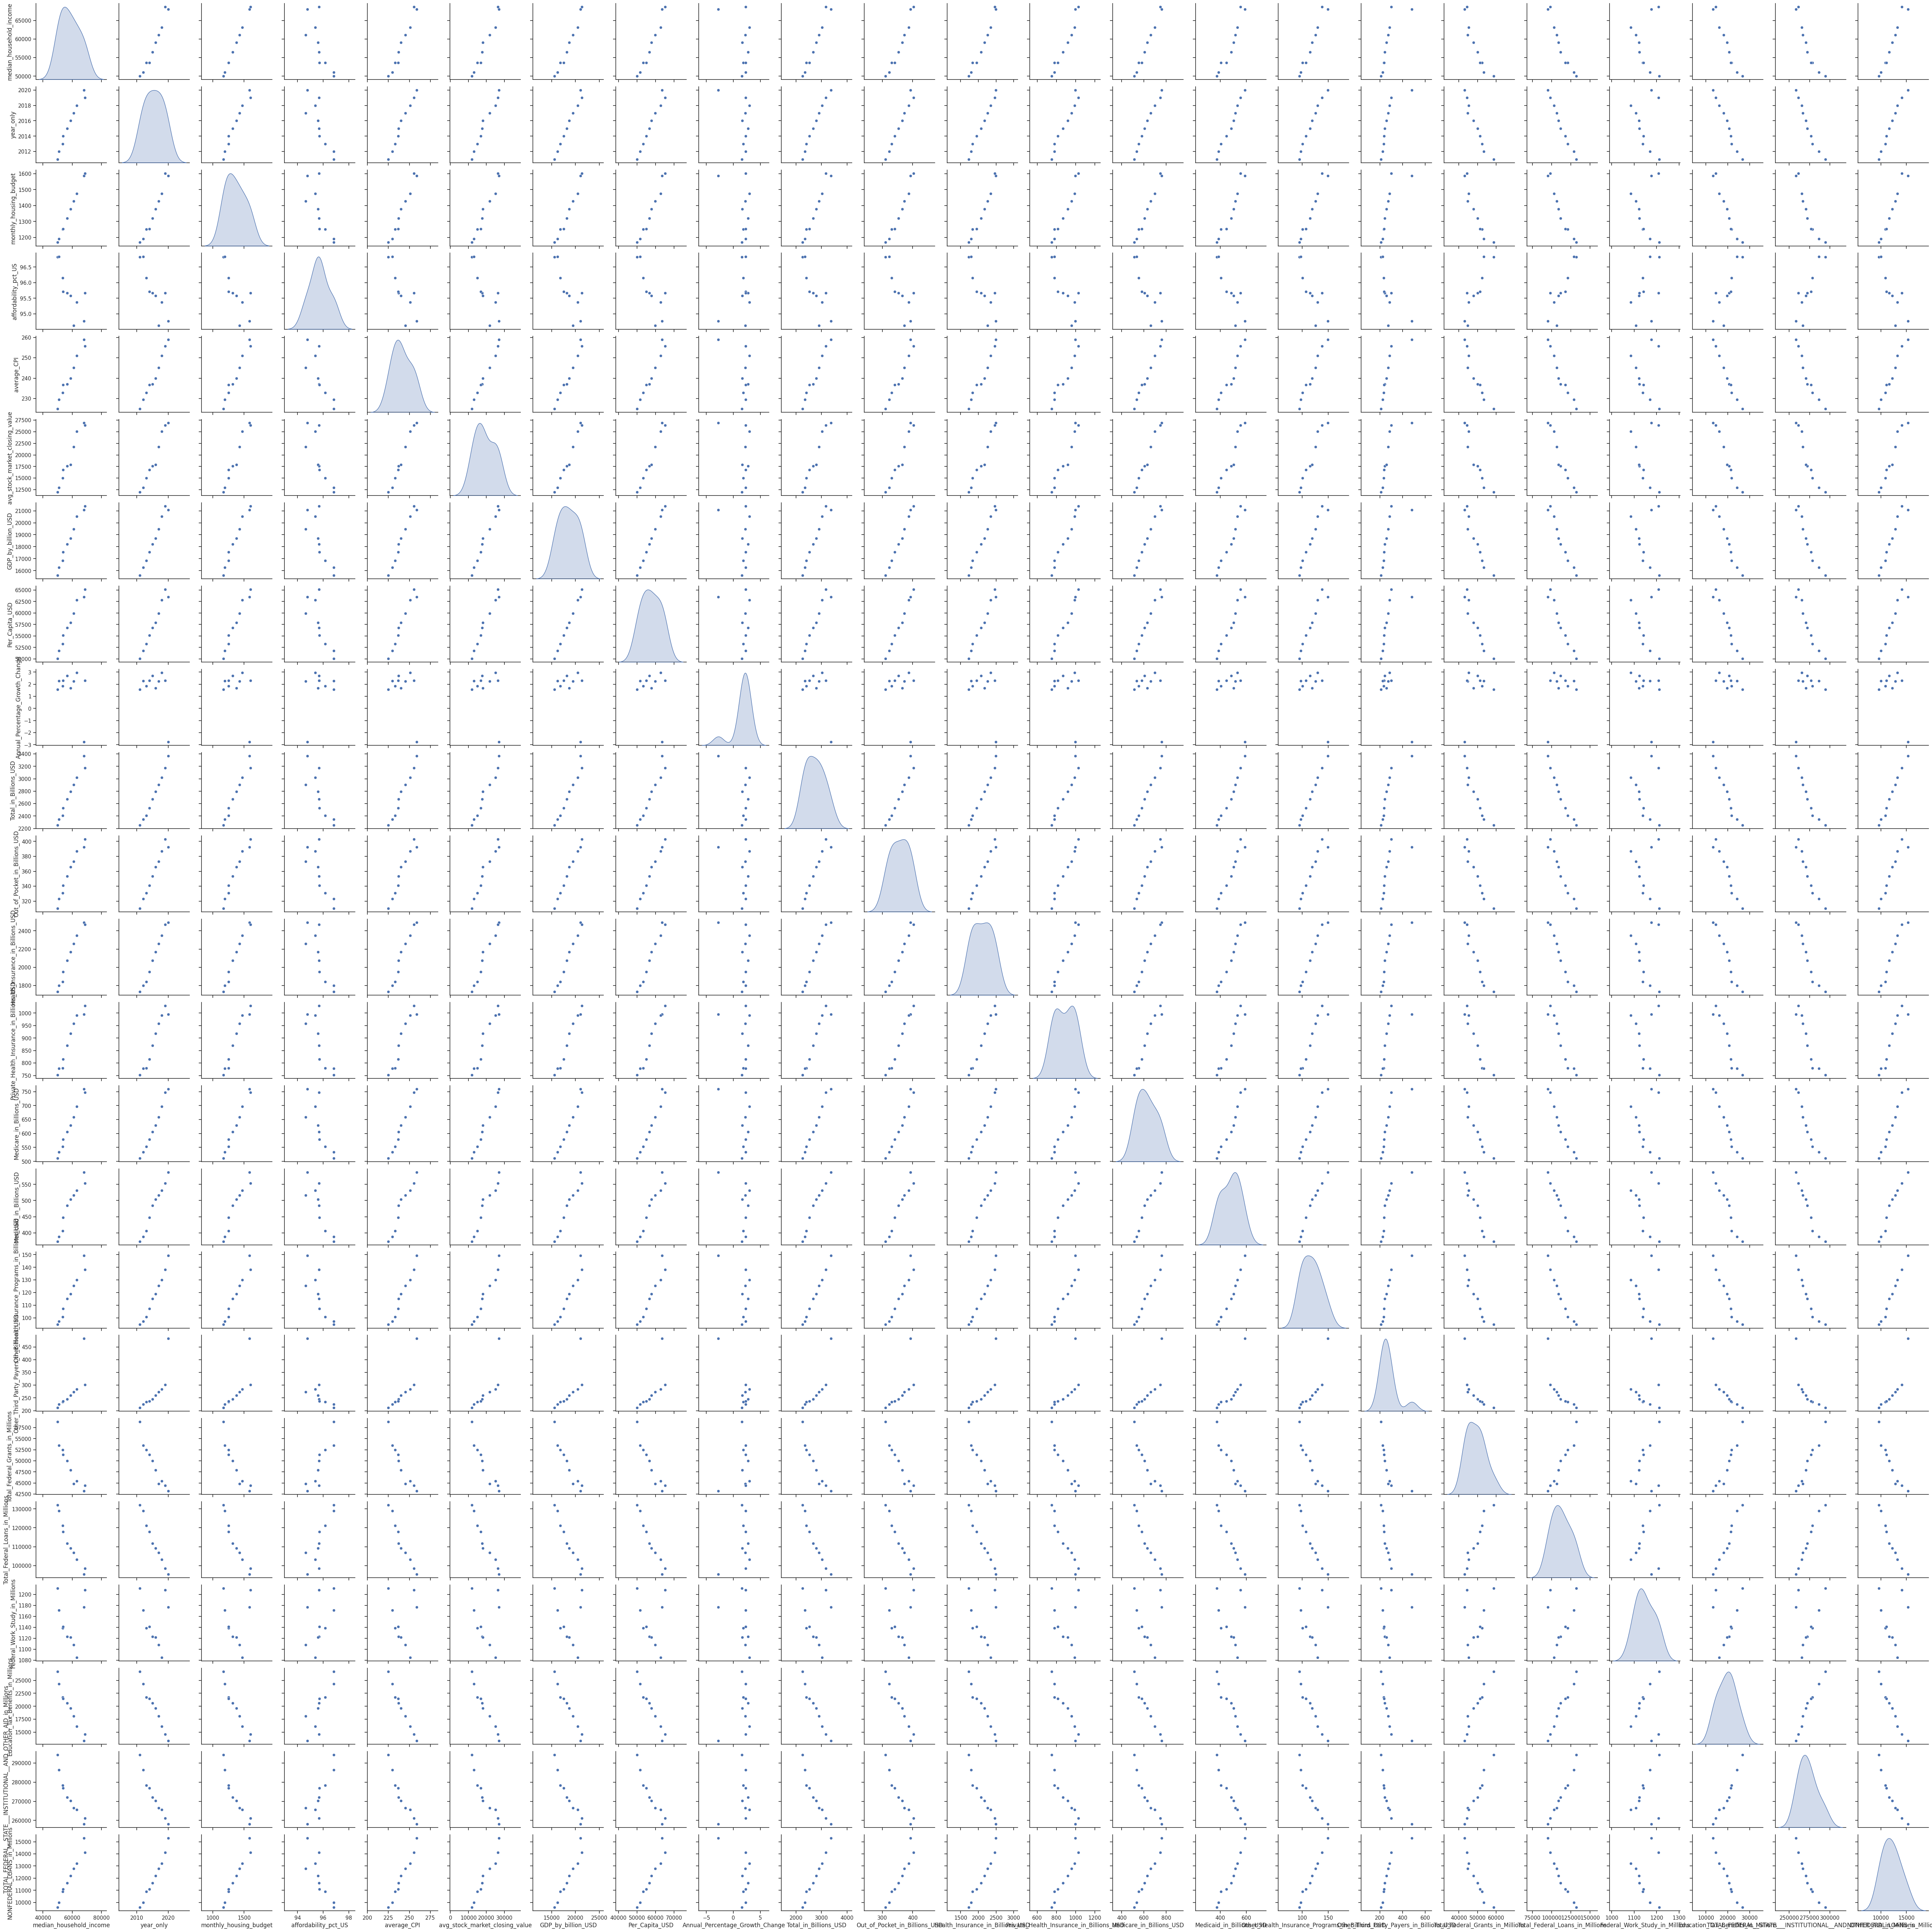

In [6]:
import seaborn as sns

sns.set(style="ticks")
sns.pairplot(df_usinv, diag_kind='kde', kind='scatter')
plt.show()

In [ ]:
# Ridge Regression, inventory and sales, US (national), 2011-2020

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [8]:
# Assuming 'df_st' is your DataFrame with predictor variables and the outcome variable
X = df_usinv.drop(['affordability_pct_US', 'state', 'year_only', 'monthly_housing_budget'], axis=1)  # Predictor variables
y = df_usinv['affordability_pct_US']  # Outcome variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Create a Ridge regression model with a specified alpha (regularization strength)
alpha = 100  # set to 100 per the recommendation of the Ridge analysis
ridge_model = Ridge(alpha=alpha)

# Fit the model to the training data
ridge_model.fit(X_train, y_train)

Ridge(alpha=100)

In [10]:
# Predict the target values on the test set
y_pred = ridge_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) to evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.17629573725173073


In [11]:
from sklearn.model_selection import GridSearchCV

# Define a range of alpha values to search over
alphas = [0.01, 0.1, 1, 10, 100]

# Create a parameter grid for the grid search
param_grid = {'alpha': alphas}

# Create a Ridge regression model
ridge_model = Ridge()

# Perform a grid search with cross-validation to find the best alpha
grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best alpha from the grid search
best_alpha = grid_search.best_params_['alpha']

# Train a Ridge model with the best alpha
best_ridge_model = Ridge(alpha=best_alpha)
best_ridge_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, Undefined

Ridge(alpha=0.01)

In [ ]:
# Lasso Regression, inventory and sales, US (national), 2011-2020

In [7]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [13]:
df_usinv.head()

,median_household_income,state,year_only,monthly_housing_budget,affordability_pct_US,average_CPI,avg_stock_market_closing_value,GDP_by_billion_USD,Per_Capita_USD,Annual_Percentage_Growth_Change,...,Medicare_in_Billions_USD,Medicaid_in_Billions_USD,Other_Health_Insurance_Programs_in_Billions_USD,Other_Third_Party_Payers_in_Billions_USD,Total_Federal_Grants_in_Millions,Total_Federal_Loans_in_Millions,Federal_Work_Study_in_Millions,Education_Tax_Benefits_in_Millions,TOTAL_FEDERAL__STATE___INSTITUTIONAL__AND_OTHER_AID_in_Millions,NONFEDERAL_LOANS_in_Millions
0,61140,US,2017,1426.600000,94.621812,245.121000,21750.20375,19477.34,59907.75,2.2419,...,659.1,516.0,125.4,272.7,44790.0,106883.0,1108.0,18060.0,266532.0,12800.0
1,56520,US,2015,1318.800000,95.672898,237.001750,17587.02917,18206.02,56762.73,2.7064,...,606.2,484.5,115.2,244.6,50036.0,111734.0,1123.0,20630.0,272117.0,11600.0
2,68010,US,2020,1586.900000,94.771427,258.850583,26890.67360,21060.47,63528.63,-2.7678,...,759.6,587.7,149.4,482.3,43165.0,95422.0,1177.0,13320.0,258117.0,15300.0
3,53590,US,2013,1250.433333,96.150835,232.951750,15009.52278,16843.19,53291.13,1.8419,...,553.5,405.7,100.8,234.2,52474.0,121243.0,1139.0,21740.0,278357.0,10900.0
4,63180,US,2018,1474.200000,95.372919,251.099500,25046.85735,20533.06,62823.31,2.9454,...,696.7,531.5,129.9,284.5,45407.0,103195.0,1085.0,16110.0,265610.0,13200.0


In [14]:
X = df_usinv[['average_CPI', 'avg_stock_market_closing_value', 'GDP_by_billion_USD', 'Per_Capita_USD', 'Out_of_Pocket_in_Billions_USD', 'Total_Federal_Loans_in_Millions']]
y = df_usinv['affordability_pct_US']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
lasso = Lasso(alpha=100)
lasso.fit(X_train, y_train)

Lasso(alpha=100)

In [17]:
y_pred = lasso.predict(X_test)

In [18]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.3961901363479393


In [19]:
coef = lasso.coef_
feature_names = X.columns

for feature, weight in zip(feature_names, coef):
    print(f"{feature}: {weight}")

average_CPI: 0.0
avg_stock_market_closing_value: 0.0
GDP_by_billion_USD: 0.0
Per_Capita_USD: 0.0
Out_of_Pocket_in_Billions_USD: 0.0
Total_Federal_Loans_in_Millions: 5.985884108923974e-05


In [20]:
lasso_coeffs = lasso.coef_
feature_names = X.columns

# Print the selected predictors and their corresponding coefficients
for feature, coef in zip(feature_names, lasso_coeffs):
    if coef != 0:
        print(f'{feature}: {coef}')

Total_Federal_Loans_in_Millions: 5.985884108923974e-05


In [8]:
import matplotlib.pyplot as plt

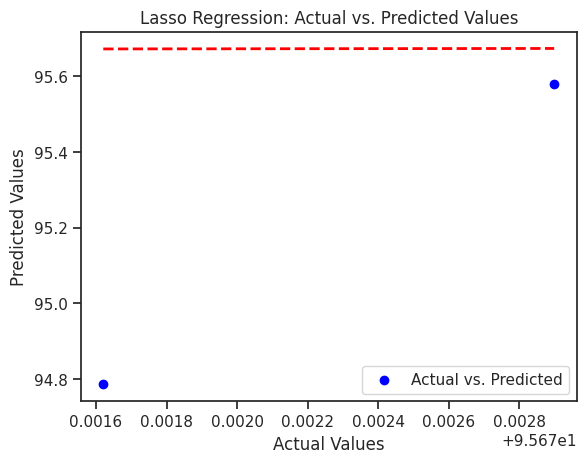

In [22]:
plt.scatter(y_test, y_pred, c='blue', marker='o', label='Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Regression: Actual vs. Predicted Values')
plt.legend()
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Predictions')
plt.show()

In [ ]:
# Linear Regression Analysis, inventory and sales, US (national), 2011-2020

In [9]:
from sklearn.linear_model import LinearRegression

In [15]:
X = df_usinv.drop(['affordability_pct_US', 'state', 'year_only', 'monthly_housing_budget'], axis=1)
y = df_usinv['affordability_pct_US']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [18]:
lr.fit(X_train, y_train)

LinearRegression()

In [19]:
c = lr.intercept_
c

22.835759942854992

In [20]:
m = lr.coef_

In [21]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

y_pred_train

array([96.82798993, 94.62181154, 95.7132066 , 94.77142722, 96.84029614,
       95.3729189 , 96.15083507, 95.5875153 ])

In [22]:
import matplotlib.pyplot as plt

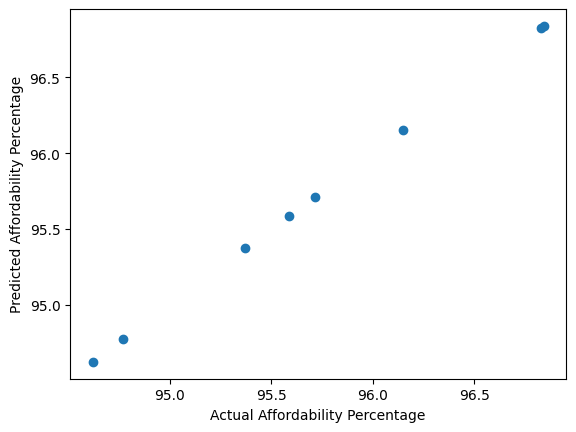

In [23]:
plt.scatter(y_train, y_pred_train)
plt.xlabel("Actual Affordability Percentage")
plt.ylabel("Predicted Affordability Percentage")
plt.show()

In [24]:
from sklearn.metrics import r2_score

In [25]:
r2_score(y_train, y_pred_train)

1.0

In [26]:
y_pred_test = lr.predict(X_test)

In [27]:
y_pred_test = lr.predict(X_test)

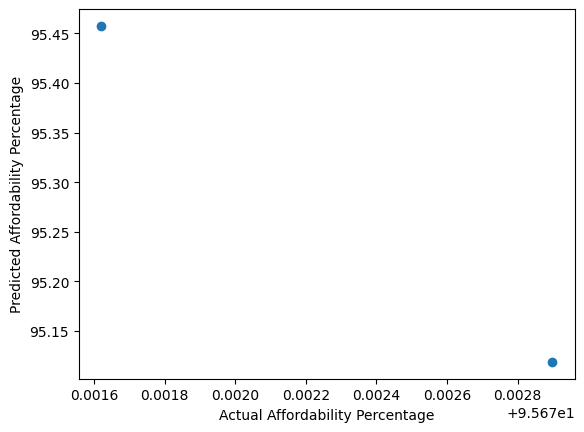

In [28]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_test)
plt.xlabel("Actual Affordability Percentage")
plt.ylabel("Predicted Affordability Percentage")
plt.show()

In [29]:
r2_score(y_test, y_pred_test)

-432294.6621210245

In [30]:
mse = mean_squared_error(y_test, y_pred_test)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.17641596576459284


In [ ]:
# Distribution of affordability, inventory and sales true/false categorical data

In [31]:
dflog_stinv = pd.read_csv('/content/drive/MyDrive/Data/KaggleX/pythondata/inv_state_pct_mortgage.csv')
dflog_stinv

,value,state,year_only,median_household_income,monthly_mortgage_payment,is_affordable
0,147588.0,AL,2011,42590,11892.313067,True
1,145830.0,AL,2011,42590,11750.657333,True
2,167000.0,AL,2011,42590,13456.488889,False
3,163500.0,AL,2011,42590,13174.466667,False
4,92000.0,AL,2011,42590,7413.155556,True
...,...,...,...,...,...,...
151644,330067.0,WY,2020,73780,26596.065378,False
151645,1186875.0,WY,2020,73780,95635.750000,False
151646,243500.0,WY,2020,73780,19620.688889,True
151647,281120.0,WY,2020,73780,22652.024889,False


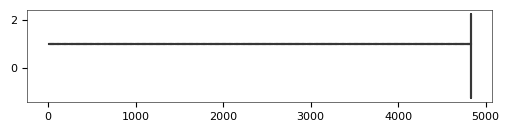

In [32]:
dflog_stinv['state'] = dflog_stinv['state'].astype('category')
dflog_stinv['state'] = dflog_stinv['state'].cat.codes

In [33]:
dflog_stinv['is_affordable'] = dflog_stinv['is_affordable'].astype('category')
dflog_stinv['is_affordable'] = dflog_stinv['is_affordable'].cat.codes

In [34]:
affordability_distribution = dflog_stinv['is_affordable'].value_counts()
print(affordability_distribution)

1    111501
0     40148
Name: is_affordable, dtype: int64


In [35]:
distribution = dflog_stinv['is_affordable'].value_counts(normalize=True) * 100
print(distribution)

1    73.525707
0    26.474293
Name: is_affordable, dtype: float64


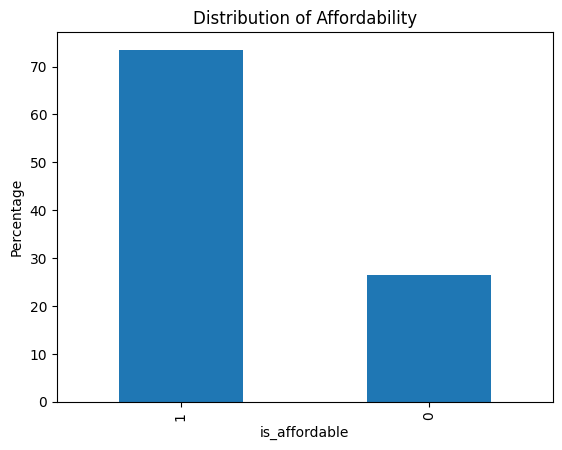

In [36]:
affordability_percentage = dflog_stinv['is_affordable'].value_counts(normalize=True) * 100

# Plot the distribution as percentages
affordability_percentage.plot(kind='bar')
plt.title('Distribution of Affordability')
plt.xlabel('is_affordable')
plt.ylabel('Percentage')
plt.show()

In [ ]:
# ADABoost algorithm, df_usinv (inventory and sales, US aggregated data, percentage, 2011-2020)

In [37]:
df_usinv.head()

,median_household_income,state,year_only,monthly_housing_budget,affordability_pct_US,average_CPI,avg_stock_market_closing_value,GDP_by_billion_USD,Per_Capita_USD,Annual_Percentage_Growth_Change,...,Medicare_in_Billions_USD,Medicaid_in_Billions_USD,Other_Health_Insurance_Programs_in_Billions_USD,Other_Third_Party_Payers_in_Billions_USD,Total_Federal_Grants_in_Millions,Total_Federal_Loans_in_Millions,Federal_Work_Study_in_Millions,Education_Tax_Benefits_in_Millions,TOTAL_FEDERAL__STATE___INSTITUTIONAL__AND_OTHER_AID_in_Millions,NONFEDERAL_LOANS_in_Millions
0,61140,US,2017,1426.600000,94.621812,245.121000,21750.20375,19477.34,59907.75,2.2419,...,659.1,516.0,125.4,272.7,44790.0,106883.0,1108.0,18060.0,266532.0,12800.0
1,56520,US,2015,1318.800000,95.672898,237.001750,17587.02917,18206.02,56762.73,2.7064,...,606.2,484.5,115.2,244.6,50036.0,111734.0,1123.0,20630.0,272117.0,11600.0
2,68010,US,2020,1586.900000,94.771427,258.850583,26890.67360,21060.47,63528.63,-2.7678,...,759.6,587.7,149.4,482.3,43165.0,95422.0,1177.0,13320.0,258117.0,15300.0
3,53590,US,2013,1250.433333,96.150835,232.951750,15009.52278,16843.19,53291.13,1.8419,...,553.5,405.7,100.8,234.2,52474.0,121243.0,1139.0,21740.0,278357.0,10900.0
4,63180,US,2018,1474.200000,95.372919,251.099500,25046.85735,20533.06,62823.31,2.9454,...,696.7,531.5,129.9,284.5,45407.0,103195.0,1085.0,16110.0,265610.0,13200.0


In [38]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [48]:
# X should contain the predictor variables, and y should contain the outcome variable
X = df_usinv.drop(['state', 'affordability_pct_US'], axis=1)
y = df_usinv['affordability_pct_US']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoostRegressor with a Random Forest base estimator
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor(n_estimators=10)
adaboost_regressor = AdaBoostRegressor(estimator=estimator, n_estimators=50, random_state=42)

# Fit the AdaBoost model to the training data
adaboost_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = adaboost_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.32026318605029863


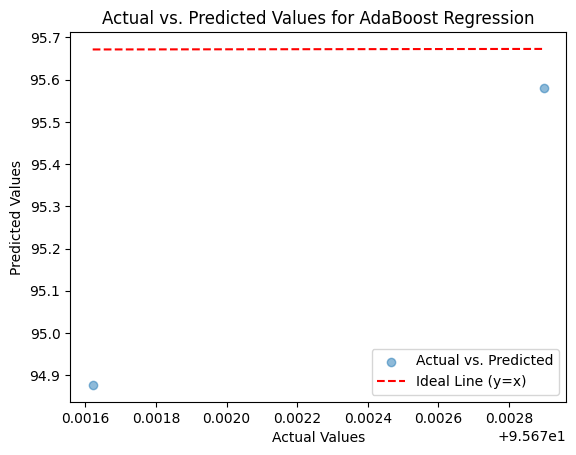

In [49]:
import matplotlib.pyplot as plt

# Assuming you have already trained and made predictions with your AdaBoostRegressor model

# Create a range of values for the line (1:1 relationship)
line_values = np.linspace(min(y_test), max(y_test), 100)

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5, label='Actual vs. Predicted')
plt.plot(line_values, line_values, color='red', linestyle='--', label='Ideal Line (y=x)')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for AdaBoost Regression")
plt.legend()
plt.show()

In [ ]:
# ADABoost algorithm, df_stinv (inventory and sales by state, percentage, 2011-2020)

In [54]:
df_stinv = pd.read_csv('/content/drive/MyDrive/Data/KaggleX/pythondata/medianhh_upd.csv')
df_stinv['state'] = df_stinv['state'].astype('category')
df_stinv['state'] = df_stinv['state'].cat.codes
df_stinv

,median_household_income,state,year_only,affordability_pct_state,monthly_housing_budget,affordability_pct_state.1
0,91960,0,2017,NaN,2145.733333,NaN
1,50870,1,2017,100.000000,1186.966667,100.000000
2,58660,2,2017,100.000000,1368.733333,100.000000
3,70390,3,2017,100.000000,1642.433333,100.000000
4,82580,4,2017,82.280928,1926.866667,82.280928
...,...,...,...,...,...,...
515,69010,47,2012,NaN,1610.233333,NaN
516,77220,48,2012,100.000000,1801.800000,100.000000
517,65910,49,2012,100.000000,1537.900000,100.000000
518,54080,50,2012,100.000000,1261.866667,100.000000


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_0, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['median_household_income'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['state'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_3, *['year_only'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_4, *['index', 'median_household_income'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_5, *['median_household_income', 'state'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_6, *['state', 'year_only'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plot(df, x_colname, y_colname, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(6 * figscale, 6 * figscale))
  df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha)
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plot(_df_7, *['year_only', 'affordability_pct_state'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_8, *['index', 'median_household_income', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['index', 'state', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_10, *['index', 'year_only', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_11, *['index', 'affordability_pct_state', None], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_12, *['index'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_13, *['median_household_income'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_14, *['state'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_15, *['year_only'], **{})
chart

In [57]:
df_stinv.dropna(axis=0, inplace=True)

In [58]:
# X should contain the predictor variables, and y should contain the outcome variable
X = df_stinv.drop(['state', 'affordability_pct_state'], axis=1)
y = df_stinv['affordability_pct_state']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an AdaBoostRegressor with a Random Forest base estimator
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor(n_estimators=10)
adaboost_regressor = AdaBoostRegressor(estimator=estimator, n_estimators=50, random_state=42)

# Fit the AdaBoost model to the training data
adaboost_regressor.fit(X_train, y_train)

# Make predictions on the test data
y_pred = adaboost_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.024548385303976353


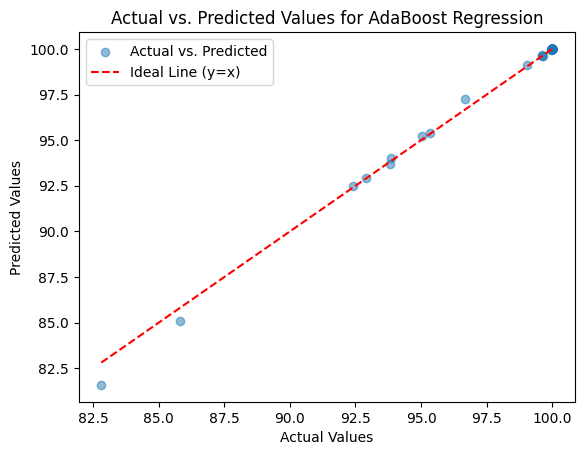

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have already trained and made predictions with your AdaBoostRegressor model

# Create a range of values for the line (1:1 relationship)
line_values = np.linspace(min(y_test), max(y_test), 100)

# Plot actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5, label='Actual vs. Predicted')
plt.plot(line_values, line_values, color='red', linestyle='--', label='Ideal Line (y=x)')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values for AdaBoost Regression")
plt.legend()
plt.show()